In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA

In [5]:
""" Data importation and preperation """

from tweedejaars_project import load_df

df = load_df()
normalized_df=(df-df.mean())/df.std()
normalized_df.dropna(inplace=True)

df.shape

/tmp/ipykernel_37775/775001494.py:6: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized.
  normalized_df=(df-df.mean())/df.std()


(220246, 29)

In [6]:
""" Model creation, compiling and fitting """

features = ['import_capacity',
       'mid_price_published', 'max_price_published', 'minute_in_ptu',
       'settlement_price_bestguess', 'time_since_last_two_sided',
       'two_sided_daily_count', 'vwap_avg',
       'naive_strategy_action', 'forecast_wind',
       'forecast_solar', 'forecast_demand', 'ptu_id']

pca = PCA()
components = pca.fit_transform(normalized_df[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(len(features)),
    color=df['settlement_price_realized']
)
fig.update_traces(diagonal_visible=True)
fig.show()

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [7]:
""" Model creation, compiling and fitting """

features = ['import_capacity',
       'mid_price_published', 'max_price_published', 'minute_in_ptu',
       'settlement_price_bestguess', 'time_since_last_two_sided',
       'two_sided_daily_count', 'vwap_avg',
       'naive_strategy_action', 'forecast_wind',
       'forecast_solar', 'forecast_demand', 'ptu_id']

pca = PCA()
components = pca.fit_transform(normalized_df[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(len(features)),
    color=df['target_two_sided_ptu']
)
fig.update_traces(diagonal_visible=True)
fig.show()

['naive_strategy_action', 'min_ptu_price_known', 'min_price_published', 'forecast_wind', 'time_since_last_two_sided', 'two_sided_daily_count', 'mid_price_published', 'vwap_avg', 'vwap_std', 'vwap_qty_sum', 'minute_in_ptu', 'downward_dispatch_published', 'settlement_price_bestguess', 'import_capacity', 'upward_dispatch_published', 'settlement_price_realized', 'forecast_solar', 'igcc_contribution_down_published', 'vwap_max', 'ptu_id', 'datetime', 'vwap_median', 'PTU', 'hvq_delta', 'forecast_demand', 'max_ptu_price_known', 'igcc_contribution_up_published', 'max_price_published']


<BarContainer object of 28 artists>

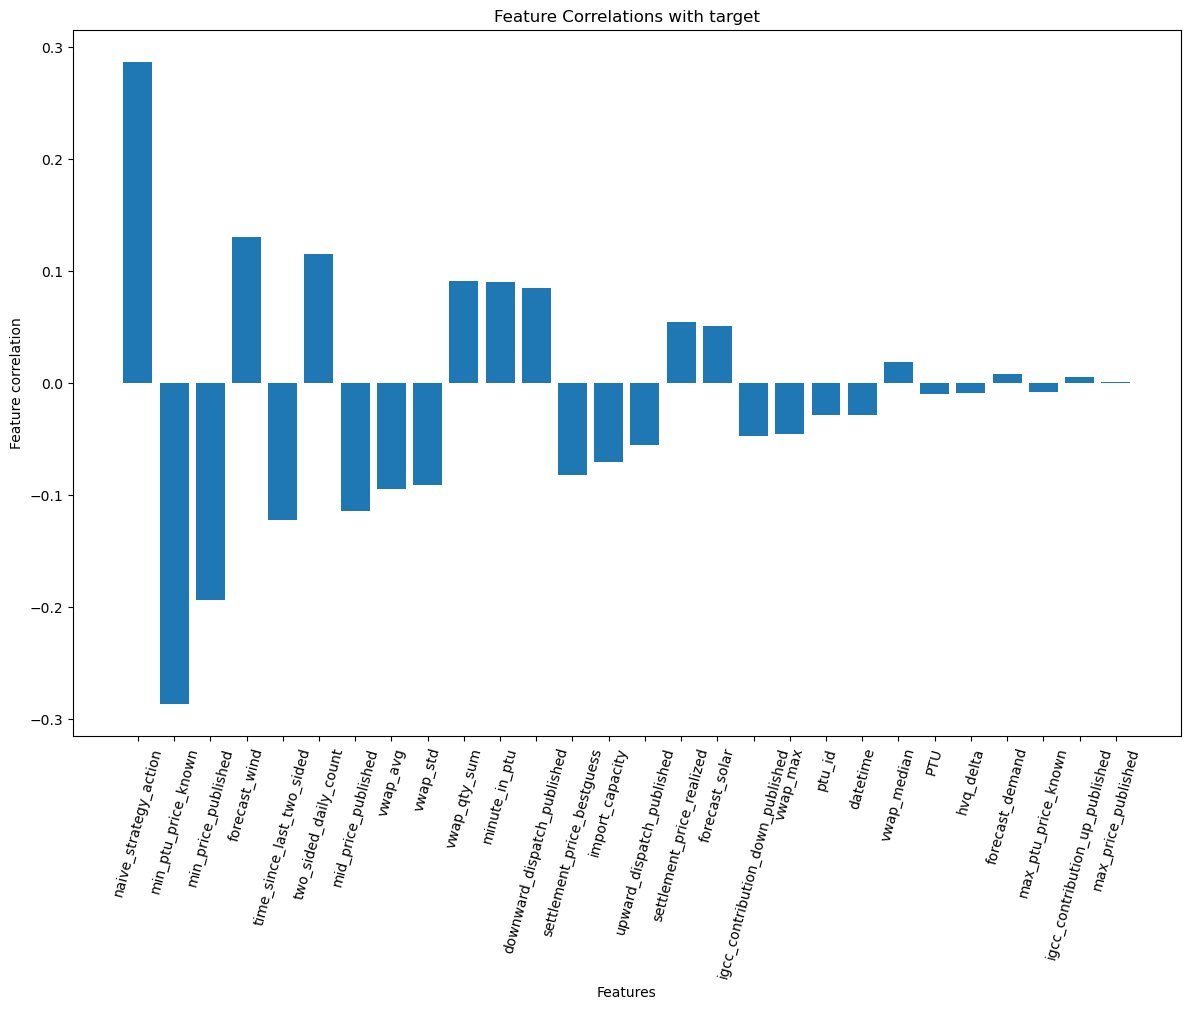

In [24]:
features = ['import_capacity',
       'mid_price_published', 'max_price_published', 'minute_in_ptu',
       'settlement_price_bestguess', 'time_since_last_two_sided',
       'two_sided_daily_count', 'vwap_avg',
       'naive_strategy_action', 'forecast_wind',
       'forecast_solar', 'forecast_demand', 'ptu_id']

features = df.columns.drop('target_two_sided_ptu')

corr_ls = []
for feature in features:
    c = df[feature].corr(df['target_two_sided_ptu'])
    corr_ls.append((feature, c))

cor_ls = [(feature, df[feature].corr(df['target_two_sided_ptu'])) for feature in features]
cor_ls.sort(key=lambda x: abs(x[1]), reverse=True)

feature_ls = [x[0] for x in cor_ls]
correlations = [x[1] for x in cor_ls]

print(feature_ls)
plt.figure(figsize=(12, 8))
plt.xlabel('Features')
plt.ylabel('Feature correlation')
plt.title('Feature Correlations with target')
plt.tight_layout()
plt.xticks(rotation=75)
plt.bar(x=feature_ls, height=correlations)
